# Importing Libraries

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [336]:
df = pd.read_csv('vehiclesFinal.csv')
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


# Basic Information about Dataset

In [337]:
df.describe()

,id,year,odometer,lat,long,price
count,3.742220e+05,374222.000000,374222.000000,374222.000000,374222.000000,374222.000000
mean,7.115975e+09,2011.170933,99082.730455,38.467335,-94.839612,14251.653588
std,4.583794e+06,5.264778,56671.829463,6.089110,17.994045,11137.719627
min,7.104271e+09,1995.000000,0.000000,-83.197100,-177.012000,699.000000
25%,7.112466e+09,2008.000000,53503.250000,34.245500,-110.979000,6000.000000
50%,7.117111e+09,2012.000000,97235.000000,39.049600,-89.438545,11500.000000
75%,7.120107e+09,2015.000000,138134.000000,42.510000,-81.431300,18995.000000
max,7.121608e+09,2021.000000,268564.000000,79.601900,139.388000,126000.000000


In [338]:
df.describe(exclude='number')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
count,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222
unique,402,41,27908,6,8,5,6,3,3,4,13,12
top,springfield,ford,f-150,fair,5 cylinders,gas,clean,automatic,4wd,full-size,offroad,grey
freq,3053,66329,7009,158429,141407,325266,354719,338265,226906,318879,96965,138308


In [339]:
df.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

In [340]:
df.shape

(374222, 18)

In [341]:
df.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price'],
      dtype='object')

In [342]:
df = df.drop(['id', 'manufacturer', 'model', 'region', 'lat', 'long', 'paint_color'], axis=1)

# Data Preprocessing

In [343]:
df.dtypes

year            float64
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
price             int64
dtype: object

## Handling Missing Values
#### Identify and handle missing data through techniques such as imputation, removal, or filling with default values.

In [344]:
df.isna().sum()

year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
price           0
dtype: int64

In [345]:
# Removing 'cylinders' from cylinders column

df['cylinders'] = df['cylinders'].str.extract('(\d+)')

In [346]:
df.isna().sum()

year              0
condition         0
cylinders       840
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
size              0
type              0
price             0
dtype: int64

In [347]:
df['cylinders'].fillna(method='bfill', inplace=True)
# df['cylinders'].ffill()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10604\1042531318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(method='bfill', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10604\1042531318.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'].fillna(method='bfill', inplace=True)


In [348]:
df.isna().sum()

year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
price           0
dtype: int64

In [349]:
df['cylinders'].unique()

array(['4', '5', '6', '8', '10', '12', '3'], dtype=object)

In [351]:
df['cylinders'] = df['cylinders'].astype(int)

In [352]:
df['year'] = df['year'].astype(int)

In [353]:
df['year'].nunique()

27

In [354]:
# Converting dtype of 'odometer' to int

df['odometer'] = df['odometer'].astype(int)

In [355]:
df.dtypes

year             int64
condition       object
cylinders        int64
fuel            object
odometer         int64
title_status    object
transmission    object
drive           object
size            object
type            object
price            int64
dtype: object

In [356]:
df.head(3)

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,2012,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,3495
1,2014,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,13750
2,2001,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,2300


### Handling Duplicates

In [357]:
df['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [358]:
df.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,2012,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,3495
1,2014,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,13750
2,2001,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,2300
3,2004,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,9000
4,2005,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,8500


In [359]:
# Extracting Numerical Columns
num_features = df.select_dtypes('number').columns
num_features

Index(['year', 'cylinders', 'odometer', 'price'], dtype='object')

In [360]:
# Extracting Categorical Columns
cat_features = df.select_dtypes(exclude='number').columns
cat_features

Index(['condition', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

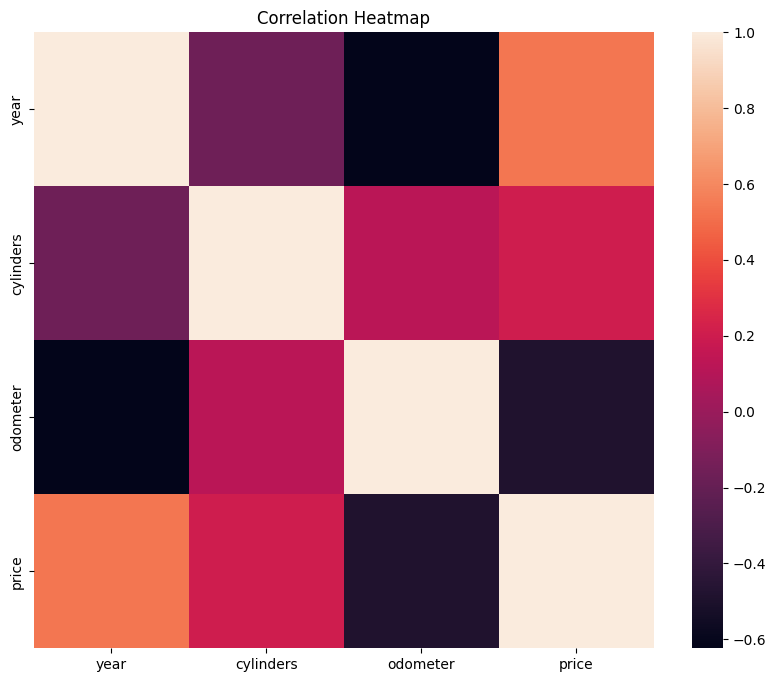

In [361]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

<Axes: >

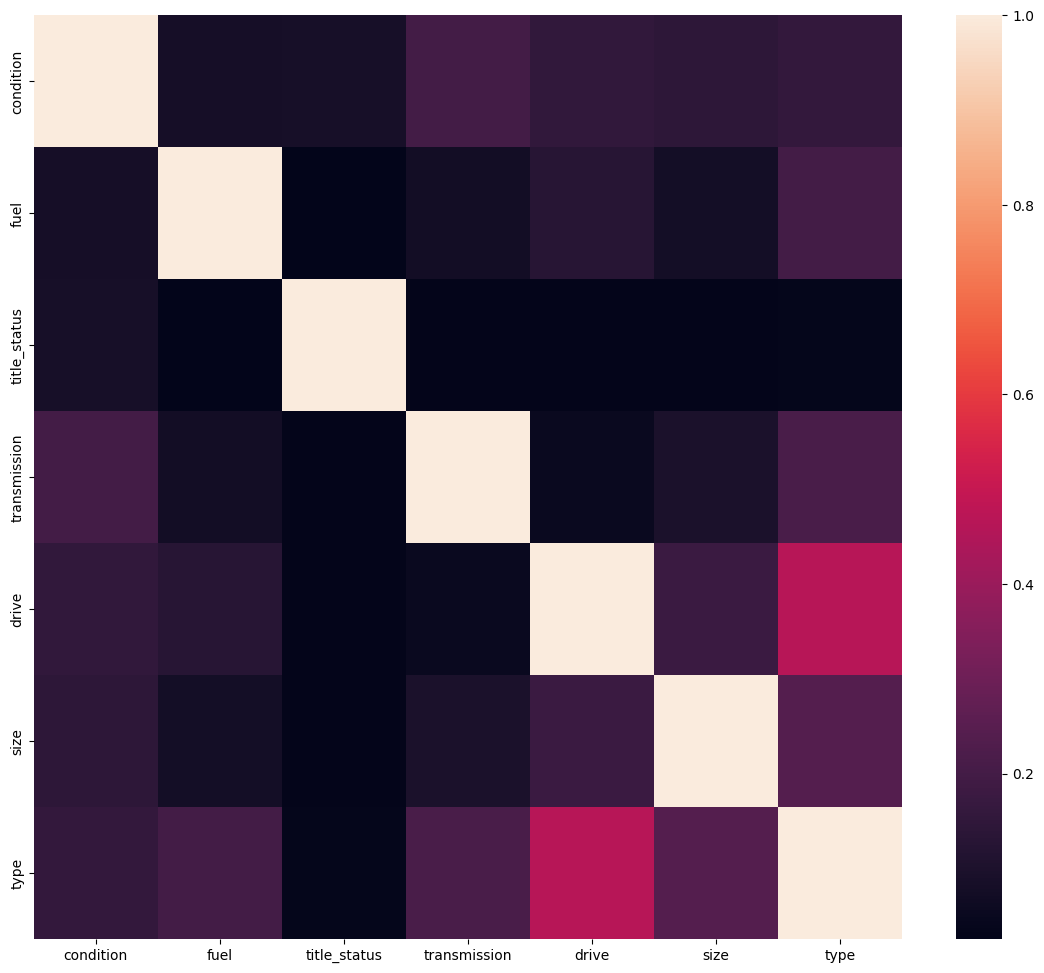

In [362]:
from dython.nominal import associations

assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

In [363]:
# Boolean Duplicates

df_duplicates = df.duplicated()
print(df_duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
374217    False
374218    False
374219    False
374220     True
374221    False
Length: 374222, dtype: bool


In [364]:
# Identifying Duplicates Rows

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

        year  condition  cylinders    fuel  odometer title_status  \
111     2012   like new          6     gas     93090        clean   
603     2020       fair          5   other      5832        clean   
694     2013  excellent          8  diesel    194596        clean   
710     2005       fair          5     gas    134000        clean   
711     2005       fair          5     gas    134000        clean   
...      ...        ...        ...     ...       ...          ...   
374209  2004  excellent          6     gas    111318        clean   
374210  2015  excellent          4     gas     46477        clean   
374211  2012       fair          5     gas    134159        clean   
374214  2017  excellent          4     gas     27100        clean   
374220  2013       fair          5     gas     93339        clean   

       transmission drive       size         type  price  
111       automatic   4wd   mid-size  convertible  13495  
603           other   4wd  full-size      offroad   1

In [365]:
# Controlling Duplicates Detection with 'Keep'

all_duplicates = df[df.duplicated(keep=False)]

In [366]:
# Removing duplicate rows
df_no_duplicates = df.drop_duplicates()

In [367]:
df.shape

(374222, 11)

### Outliers

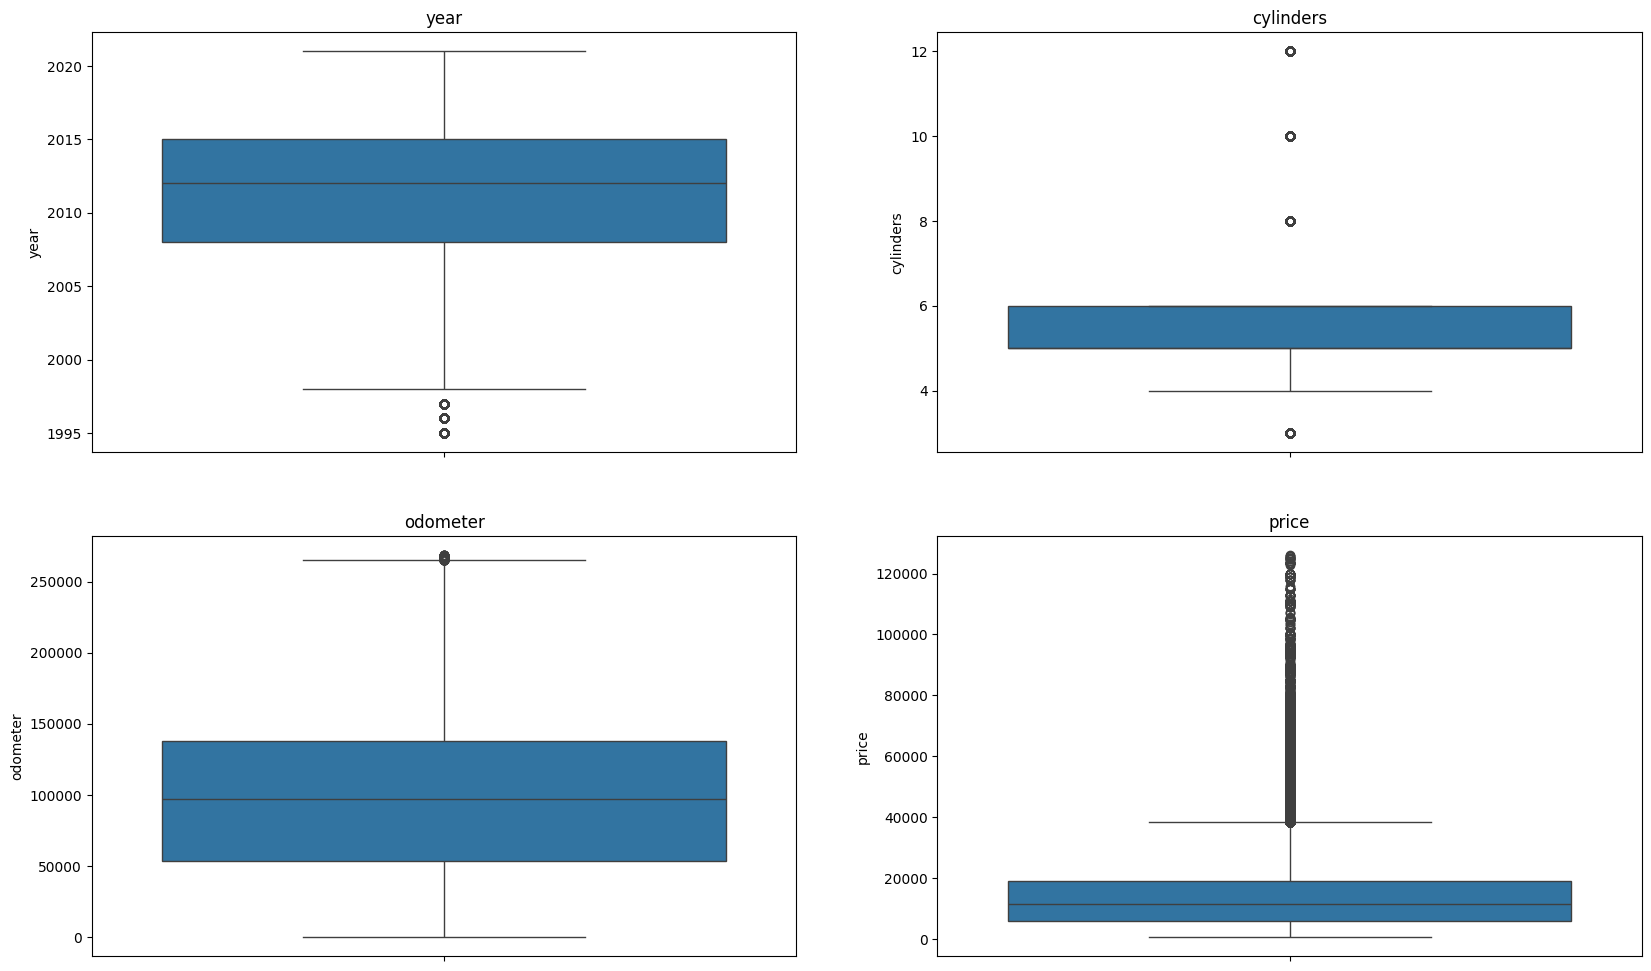

In [371]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)

In [372]:
for col in num_features:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    threshold = 3
    df = df[z_scores < threshold]

In [373]:
df.shape

(365841, 11)

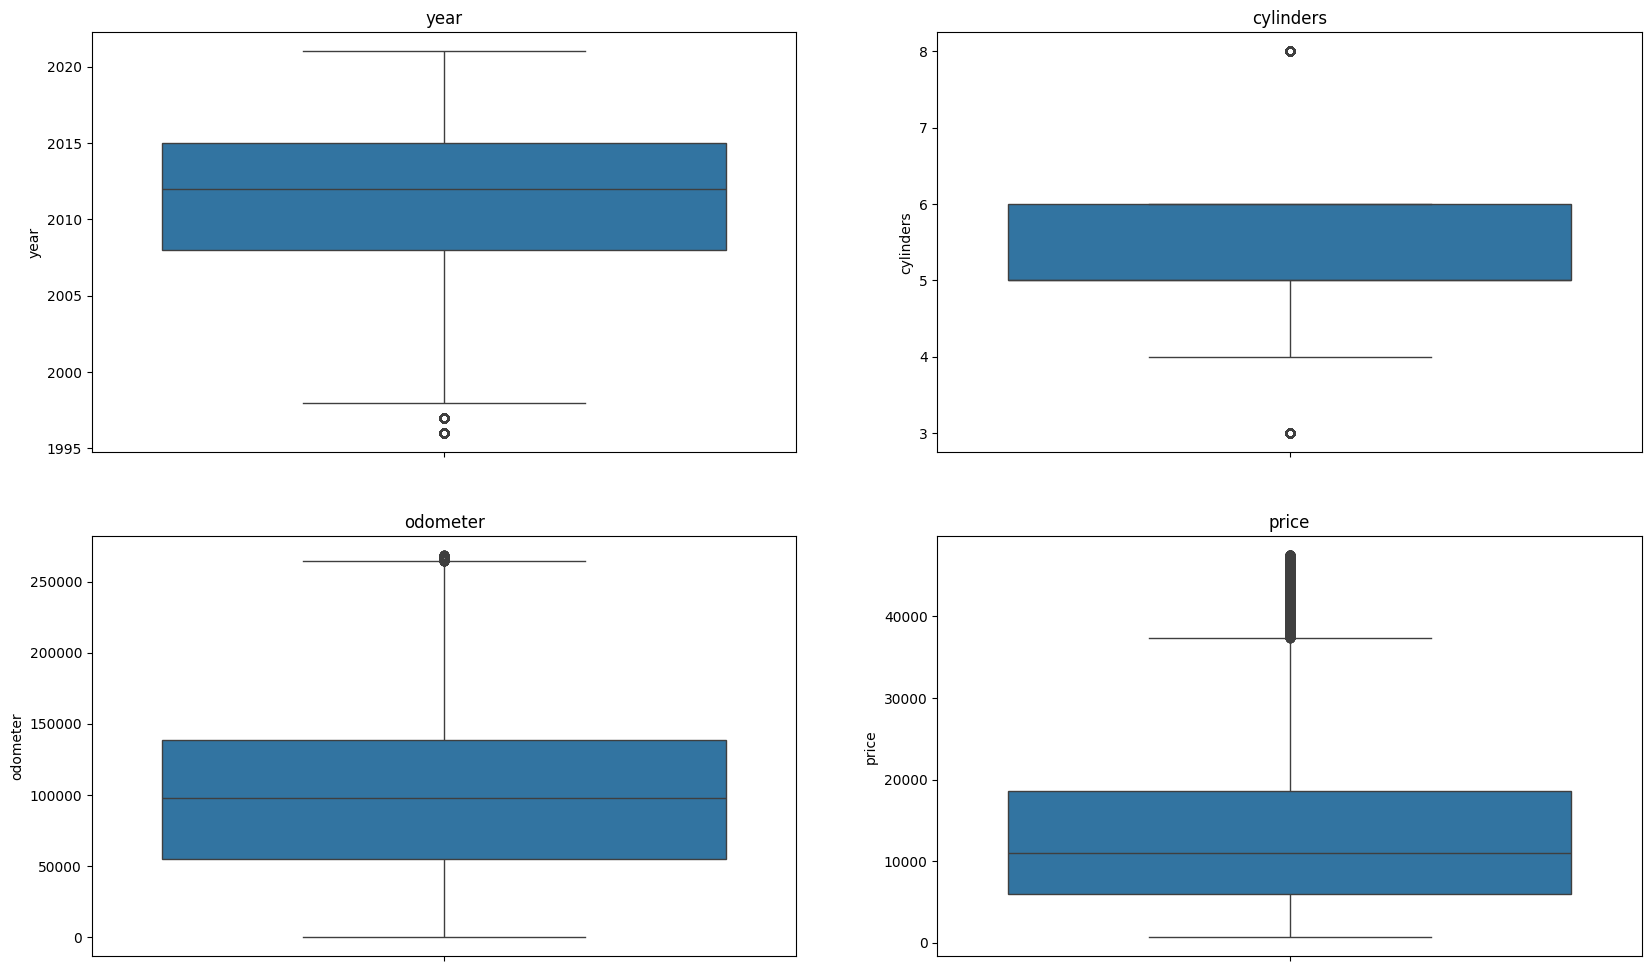

In [374]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)

# Data Visualization

#### Year vs Count of Cars

In [375]:
car_count_by_year = df.groupby('year').size()
print(len(car_count_by_year))

26


In [376]:
car_counts = df['year'].value_counts().sort_index()

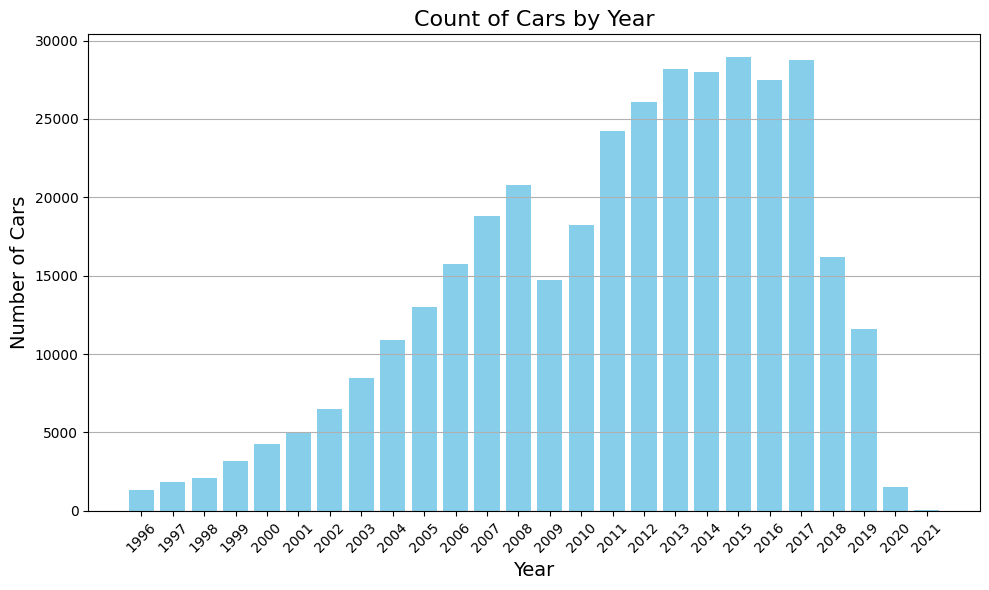

In [377]:
plt.figure(figsize=(10, 6))
plt.bar(car_counts.index.astype(str), car_counts.values, color='skyblue')
plt.title('Count of Cars by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Condition vs Count of Cars

In [378]:
condition_counts = df['condition'].value_counts().sort_index()

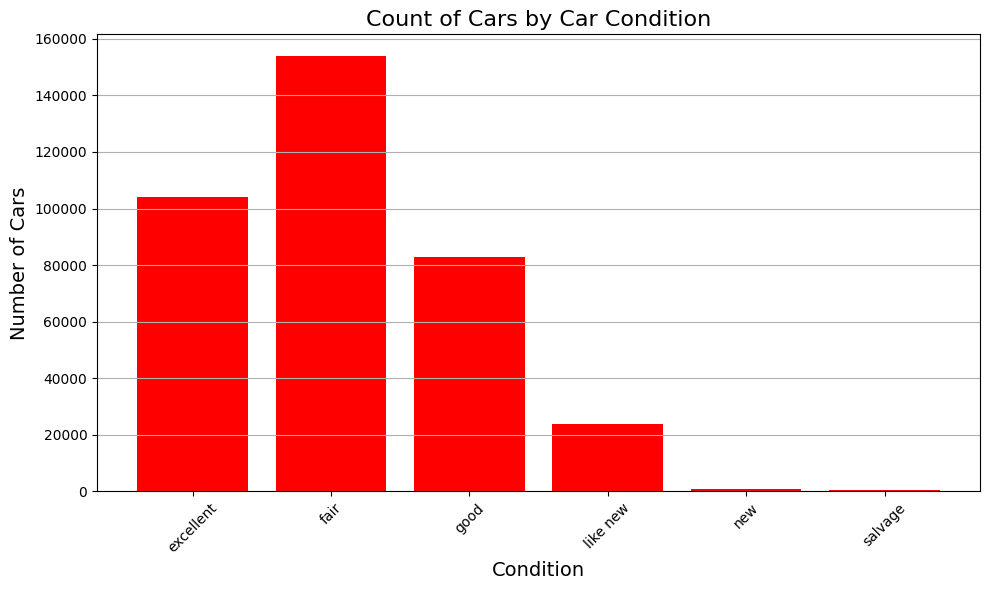

In [379]:
plt.figure(figsize=(10, 6))
plt.bar(condition_counts.index.astype(str), condition_counts.values, color='red')
plt.title('Count of Cars by Car Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Cylinders vs Count of Cars

In [380]:
cylinders_counts = df['cylinders'].value_counts().sort_index()

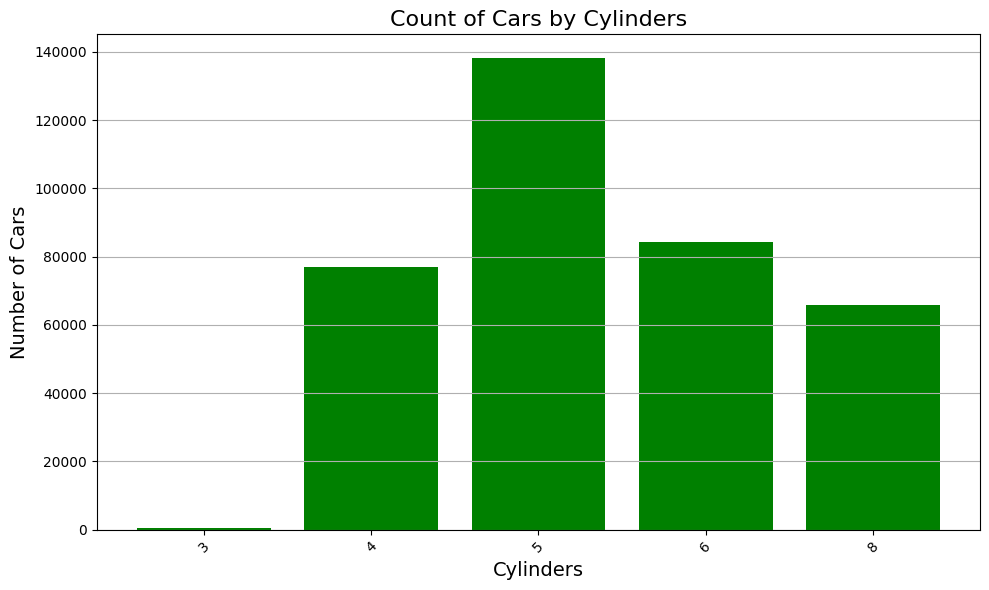

In [381]:
plt.figure(figsize=(10, 6))
plt.bar(cylinders_counts.index.astype(str), cylinders_counts.values, color='green')
plt.title('Count of Cars by Cylinders', fontsize=16)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Fuel vs Count of Cars

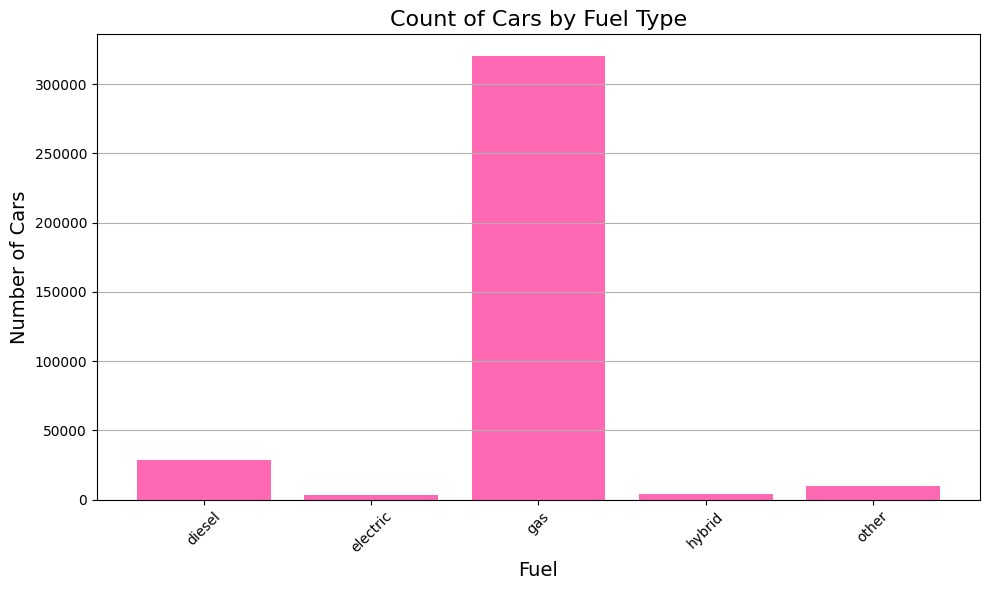

In [382]:
fuel_counts = df['fuel'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(fuel_counts.index.astype(str), fuel_counts.values, color='hotpink')
plt.title('Count of Cars by Fuel Type', fontsize=16)
plt.xlabel('Fuel', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Transmission vs Count of Cars

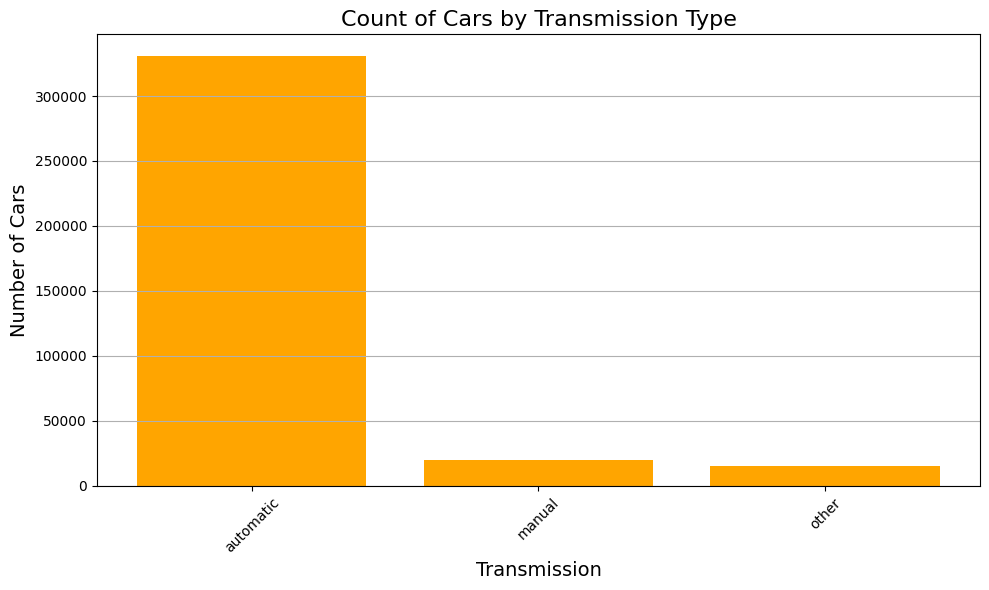

In [383]:
transmission_counts = df['transmission'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(transmission_counts.index.astype(str), transmission_counts.values, color='orange')
plt.title('Count of Cars by Transmission Type', fontsize=16)
plt.xlabel('Transmission', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Size Count

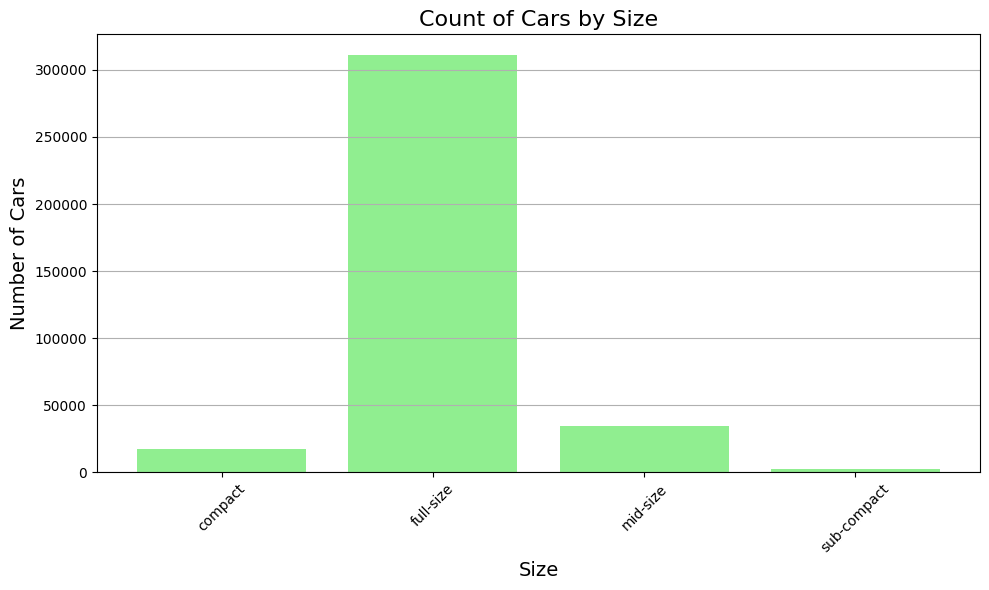

In [384]:
size_counts = df['size'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(size_counts.index.astype(str), size_counts.values, color='lightgreen')
plt.title('Count of Cars by Size', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Type Counts

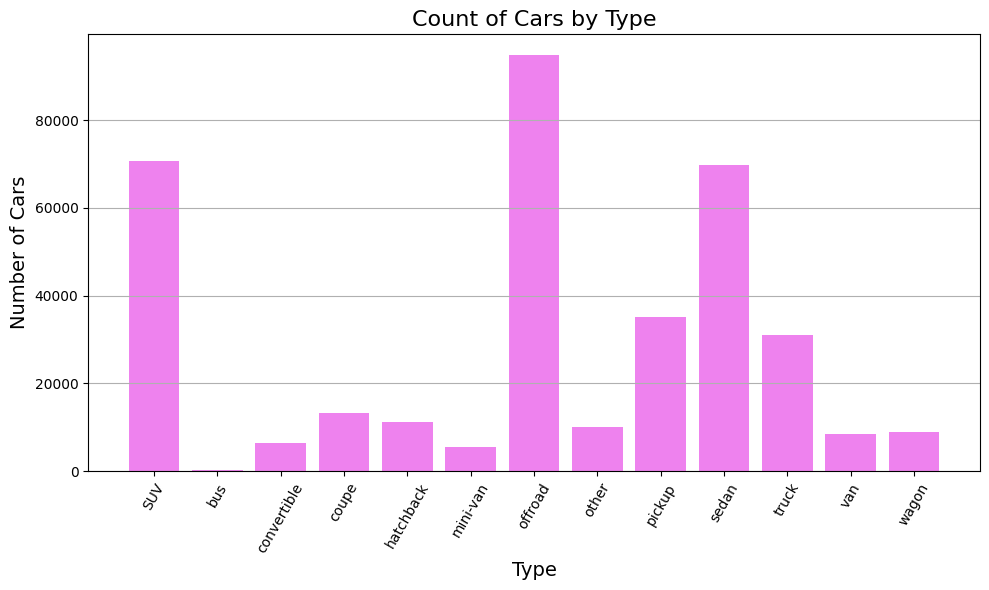

In [385]:
type_counts = df['type'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(type_counts.index.astype(str), type_counts.values, color='violet')
plt.title('Count of Cars by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Title Status Count

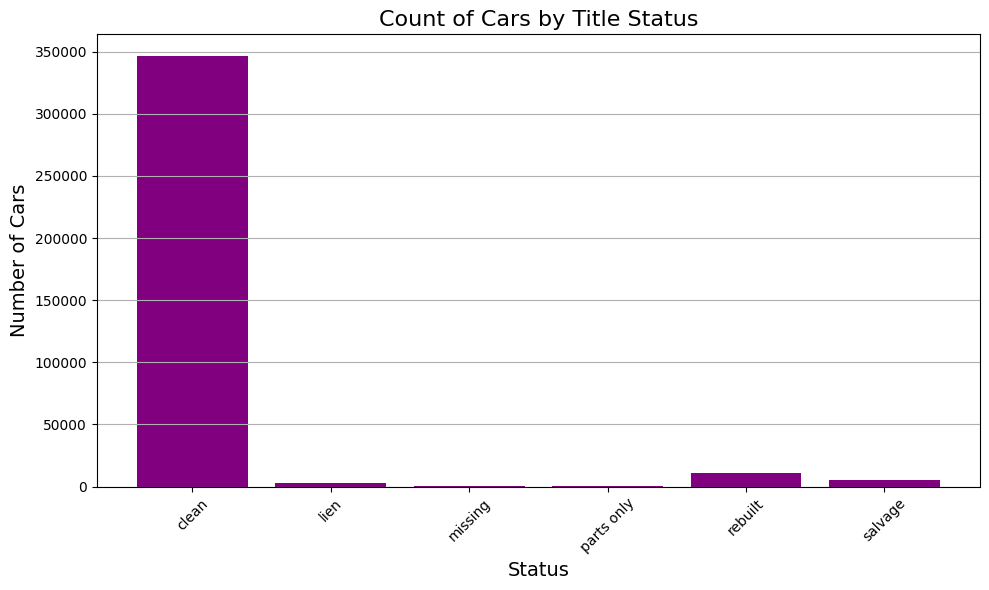

In [386]:
title_status_counts = df['title_status'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(title_status_counts.index.astype(str), title_status_counts.values, color='purple')
plt.title('Count of Cars by Title Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Drive Count

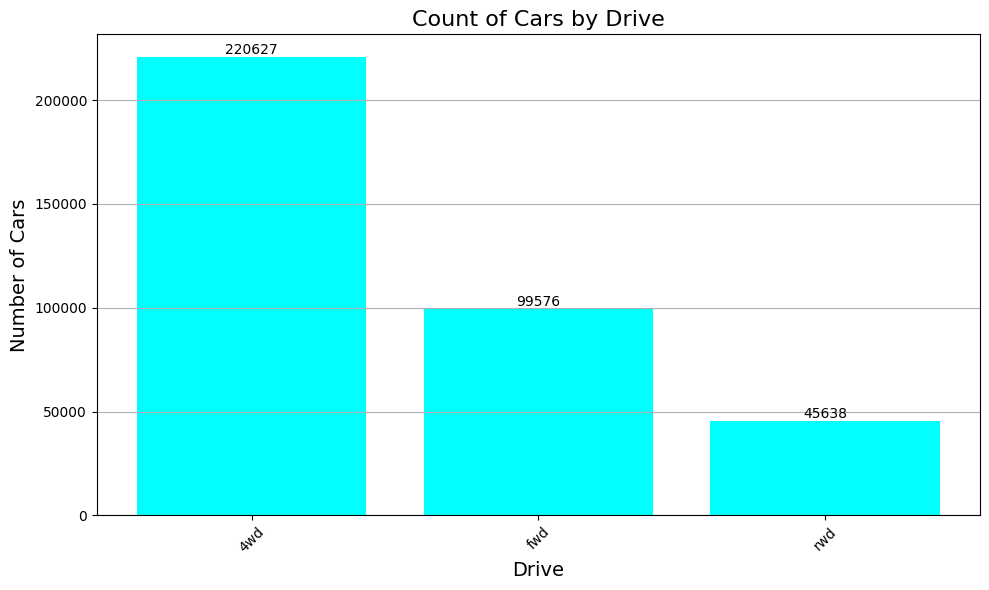

In [387]:
drive_counts = df['drive'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

bars = plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')

plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')
plt.title('Count of Cars by Drive', fontsize=16)
plt.xlabel('Drive', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Year vs Average Price

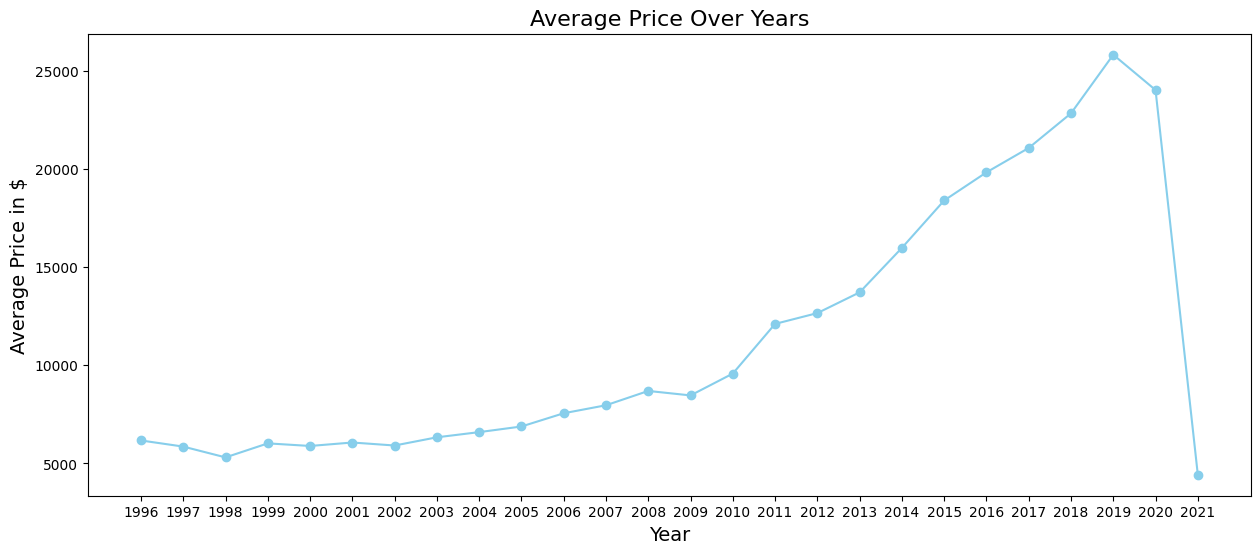

In [388]:
average_price_per_year = df.groupby('year')['price'].mean().reset_index().astype(int)
average_price_per_year.columns = ['Year', 'Average Price']  # Rename columns for clarity

plt.figure(figsize=(15, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Average Price'], marker='o', color='skyblue', linestyle='-')
plt.title('Average Price Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price in $', fontsize=14)
plt.xticks(average_price_per_year['Year'])
plt.show()

# Next Step

In [389]:
df.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,2012,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,3495
1,2014,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,13750
2,2001,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,2300
3,2004,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,9000
4,2005,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,8500


In [390]:
for i in num_features:
    print(f'{i} : ', df[i].nunique())

year :  26
cylinders :  5
odometer :  111193
price :  14777


In [427]:
for i in cat_features:
    print(f'{i} : ', df[i].nunique())
    print(f'{i} null values count : ', df[i].isna().sum())
    print("=====")

condition :  6
condition null values count :  0
=====
fuel :  5
fuel null values count :  0
=====
title_status :  6
title_status null values count :  0
=====
transmission :  3
transmission null values count :  0
=====
drive :  3
drive null values count :  0
=====
size :  4
size null values count :  0
=====
type :  13
type null values count :  0
=====


In [392]:
for i in cat_features:
    print(f'{i} : ', df[i].unique())

condition :  ['like new' 'good' 'excellent' 'fair' 'new' 'salvage']
fuel :  ['gas' 'diesel' 'electric' 'hybrid' 'other']
title_status :  ['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']
transmission :  ['automatic' 'manual' 'other']
drive :  ['4wd' 'rwd' 'fwd']
size :  ['full-size' 'mid-size' 'sub-compact' 'compact']
type :  ['offroad' 'sedan' 'pickup' 'convertible' 'van' 'truck' 'SUV' 'coupe'
 'hatchback' 'mini-van' 'wagon' 'other' 'bus']


### Copying Dataset

In [393]:
df_copy = df

In [394]:
df_copy.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,2012,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,3495
1,2014,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,13750
2,2001,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,2300
3,2004,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,9000
4,2005,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,8500


### Scaling

In [398]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_copy[['year', 'odometer', 'price']] = scaler.fit_transform(df_copy[['year', 'odometer', 'price']])
# Use scaler.inverse_transform(data) for normal values

In [399]:
df_copy.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,0.162642,like new,4,gas,2.615324,clean,automatic,4wd,full-size,offroad,-1.068743
1,0.550261,good,5,gas,-0.421141,clean,automatic,rwd,full-size,sedan,0.022791
2,-1.969264,excellent,6,gas,1.760893,clean,automatic,4wd,full-size,offroad,-1.195938
3,-1.387835,excellent,5,gas,-0.816389,clean,automatic,rwd,mid-size,pickup,-0.482795
4,-1.194026,excellent,6,gas,-0.659975,clean,automatic,rwd,mid-size,convertible,-0.536015


# Encoding

In [400]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

categorical_cols = ['fuel', 'title_status', 'transmission', 'drive', 'size', 'type']
encoded_cols = encoder.fit_transform(df_copy[categorical_cols]).toarray()

encoded_cols.shape

(365841, 34)

In [401]:
df_copy = pd.concat([df_copy, pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

# Drop the original categorical columns
df_copy = df_copy.drop(categorical_cols, axis=1)

In [402]:
df_copy.head()

,year,condition,cylinders,odometer,price,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,0.162642,like new,4.0,2.615324,-1.068743,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.550261,good,5.0,-0.421141,0.022791,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.969264,excellent,6.0,1.760893,-1.195938,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.387835,excellent,5.0,-0.816389,-0.482795,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.194026,excellent,6.0,-0.659975,-0.536015,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [403]:
for i in cat_features:
    print(f'{i} : ', df[i].unique())

condition :  ['like new' 'good' 'excellent' 'fair' 'new' 'salvage']
fuel :  ['gas' 'diesel' 'electric' 'hybrid' 'other']
title_status :  ['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']
transmission :  ['automatic' 'manual' 'other']
drive :  ['4wd' 'rwd' 'fwd']
size :  ['full-size' 'mid-size' 'sub-compact' 'compact']
type :  ['offroad' 'sedan' 'pickup' 'convertible' 'van' 'truck' 'SUV' 'coupe'
 'hatchback' 'mini-van' 'wagon' 'other' 'bus']


In [404]:
encoding_dict = {
    'excellent': 0,
    'fair': 1,
    'good': 2,
    'like new': 3,
    'new': 4,
    'salvage': 5
}

df_copy['condition'] = df_copy['condition'].replace(encoding_dict)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10604\800088250.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['condition'] = df_copy['condition'].replace(encoding_dict)


In [405]:
count_nan = df_copy['condition'].value_counts().get('nan', 0)
print("Count of 'excellent':", count_nan)

Count of 'excellent': 0


In [406]:
df_copy['condition'].unique()

array([ 3.,  2.,  0.,  1.,  4.,  5., nan])

In [407]:
df_copy.shape

(374049, 39)

In [408]:
df_copy.head()

,year,condition,cylinders,odometer,price,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,0.162642,3.0,4.0,2.615324,-1.068743,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.550261,2.0,5.0,-0.421141,0.022791,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.969264,0.0,6.0,1.760893,-1.195938,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.387835,0.0,5.0,-0.816389,-0.482795,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.194026,0.0,6.0,-0.659975,-0.536015,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [409]:
df_copy.shape

(374049, 39)

In [410]:
df_copy = df_copy.dropna()  # Drop all rows with NaN

In [411]:
df_copy.shape

(357633, 39)

# Depedent and Independent Variables

In [413]:
X = df_copy.drop(['price'], axis=1)

In [415]:
X.shape

(357633, 38)

In [416]:
y = df_copy['price']

In [417]:
y.shape

(357633,)

# Split the Dataset
### Divide the dataset into training, validation, and test sets to evaluate model performance effectively.

In [418]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [419]:
X_train.shape

(286106, 38)

In [420]:
X_test.shape

(71527, 38)

In [421]:
y_train.shape

(286106,)

In [422]:
y_test.shape

(71527,)

# Feature Scaling

# Encoding Categorical Data

# Model Building

In [425]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.5349 - val_loss: 0.4590
Epoch 2/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.4697 - val_loss: 0.4495
Epoch 3/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4627 - val_loss: 0.4566
Epoch 4/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4568 - val_loss: 0.4525
Epoch 5/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4576 - val_loss: 0.4490
Epoch 6/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4532 - val_loss: 0.4521
Epoch 7/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4524 - val_loss: 0.4515
Epoch 8/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4525 - val_loss: 0.4589
Epoch 9/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4512 - val_loss: 0.4469
Epoch 10/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4525 - val_loss: 0.4513
Epoch 11/50
7153/7153 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4514 - val_loss: 0.4476
Epoch 12/50
7153/71